# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 23 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 23 октября, -4 балла после 06:00 30 октября, -6 баллов после 06:00 6 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (4 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения, использую timeit. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (2 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (3балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (1 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt
from sklearn.metrics.pairwise import distance_metrics
import sys
reload(sys)
sys.setdefaultencoding('UTF8')

import matplotlib.pyplot as plt
##import mpl_toolkits.basemap as bm

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

%load_ext Cython
# Plotting config
%pylab inline

## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1. Авилова Екатерина
2. Адаменко Павел
3. Акиньщиков Алексей
4. Афанасьева Анастасия
5. Балес Александр
6. Беляев Владимир
7. Беспалова Анастасия
8. Богомолов Эмиль
9. Боднарюк Василий
10. Бучкин Александр
11. Валинуров Денис
12. Волков Глеб
13. Голенков Кирилл
14. Горбушин Михаил
15. Димов Илья
16. Докшина Елизавета
17. Дорожинский Владислав
18. Жирнов Михаил
19. Жолковский Евгений
20. Зайдель Петр
21. Зимнюков Максим
22. Иванов Илья
23. Кашипов Артем
24. Комов Евгений
25. Кошман Дима
26. Кузнецова Екатерина
27. Кулагин Алексей
28. Лавреновъ Виталiй
29. Лебедь Федор
30. Лешков Михаил
31. Лозинский Иван
32. Лоскутов Антон
33. Лютов Владимир
34. Мажаров Иван
35. Манкевич Павел
36. Муравьев Никита
37. Находнов Максим
38. Оплачко Николай
39. Павлов Евгений
40. Петряйкин Федор
41. Рахматуллин Фарид
42. Секретарев Тихон
43. Сенюшкин Дмитрий
44. Серов Николай
45. Смирнов Александр
46. Соловьев Павел
47. Сомов Иван
48. Спиркин Роман
49. Терёшина Мария
50. Торбунова Екатерина
51. Тюгаев Антон
52. Фельдман Борис
53. Филин Максим
54. Фролов Михаил
55. Хохлов Олег
56. Черемнов Андрей
57. Шевцов Антон
58. Шурыгин Александр

In [73]:
N = 56 # put your index here

In [74]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print u"Реализуем алгоритм кластеризации '%s'" % my_algorithm

Реализуем алгоритм кластеризации 'DBSCAN. (параметры - epsilon, min_pts)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [15]:
%%cython --cplus
cimport cython
cimport numpy as np
import numpy as np
from libcpp.vector cimport vector
@cython.boundscheck(False)
@cython.wraparound(False)
def neighbors(np.ndarray[np.float64_t, ndim=2] x,
              np.ndarray[np.uint8_t, ndim=1] core,
              np.ndarray[object, ndim=1] neigh,
              double eps, 
              int min_pts):
    cdef np.npy_intp i = 0
    for i in range(x.shape[0]):
        #We use euclidean metrics
        neigh[i] = np.where(((x[i] - x)**2).sum(axis=1) < eps**2)[0]
        core[i] = neigh[i].size >= min_pts 
    return neigh

@cython.boundscheck(False)
@cython.wraparound(False)
def fitd(np.ndarray[object, ndim=1] n1,
         np.ndarray[np.uint8_t, ndim=1] core,
         np.ndarray[np.npy_intp, ndim=1] labels):
    cdef np.npy_intp i = 0
    cdef np.npy_intp j = 0
    cdef np.npy_intp label_num = 0
    cdef np.npy_intp v = 0
    cdef np.ndarray[np.npy_intp, ndim=1] n2
    cdef vector[np.npy_intp] vect

    for i in xrange(labels.shape[0]):
        if labels[i] == -1 and core[i]:
            t = 0
            while vect.size() != 0 or t == 0:
                t = 1
                if labels[i] == -1:
                    labels[i] = label_num
                    if core[i]:
                        n2 = n1[i]
                        for j in range(n2.shape[0]):
                            v = n2[j]
                            if labels[v] == -1:
                                vect.push_back(v)
                if vect.size() != 0:
                    i = vect.back()
                    vect.pop_back()
            label_num += 1

In [16]:
## Задание 1
from sklearn.base import BaseEstimator, ClusterMixin

class Clustering(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according 
    """
    
    def __init__(self, eps = 0.5, min_pts = 5):
        """
        Please add necessary algoritm parameters to class constructor.
        """
        self.eps = eps
        self.min_pts = min_pts
        return
        
    def fit(self, x, y=None):
        """
        Use data matrix x to compute model parameters
        """
        self.x_len = len(x)
        core = np.empty(x.shape[0], dtype = uint8)
        neigh = np.empty(x.shape[0], dtype = object)
        neighbors(x, core, neigh, self.eps, self.min_pts)
        self.labels = -np.ones(x.shape[0], dtype=np.intp)
        fitd(neigh, core, self.labels)
        return self
    
    ##There isn't this method for DBSCAN
    def predict(self, x):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        return self.labels
    
    def fit_predict(self, x, y=None):
        self.fit(x, y)
        return self.predict(x)

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

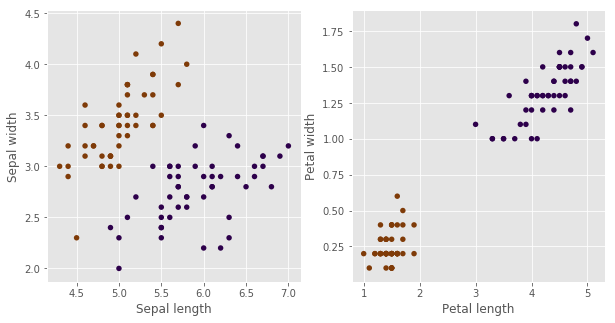

In [20]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [354]:
pred_iris = Clustering(eps = 0.65, min_pts = 5).fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris)

Adjusted Rand index for iris is: 1.00


Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [22]:
## Задание 2
def quality(x, y):
    """
    Implement quality criterion of your choice
    """
    if x.size == 0:
        return 0
    x_len = len(x)
    sil = np.empty(x_len)
    for i in range(x_len):
        a = np.sqrt(np.sum((x[i] - x[np.where(y == y[i])])**2, axis=1))
        if(a.size):
            a = a.mean()
        else:
            a = 0
        b = np.sqrt(np.sum((x[i] - x[np.where(y != y[i])])**2, axis=1))
        if(b.size):
            b = b.mean()
        else:
            b = 0
        if max(a, b) != 0:
            sil[i] = (b - a) / max(a, b)
        else:
            sil[i] = 0
    return sil.mean()

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

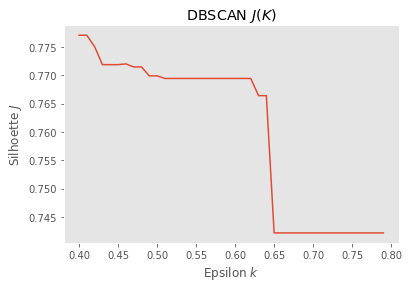

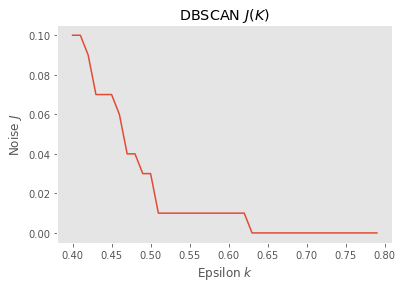

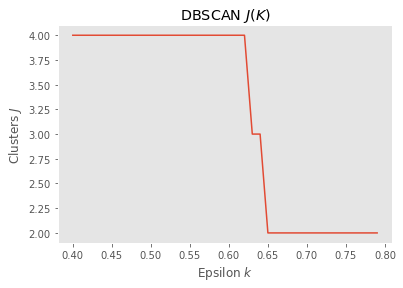

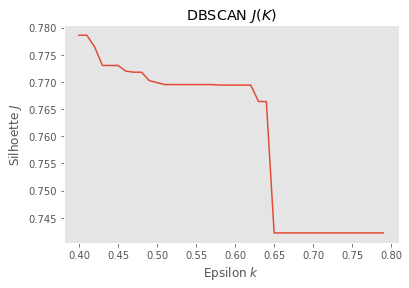

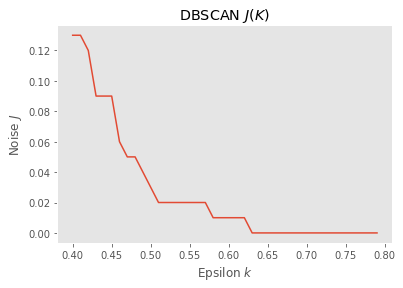

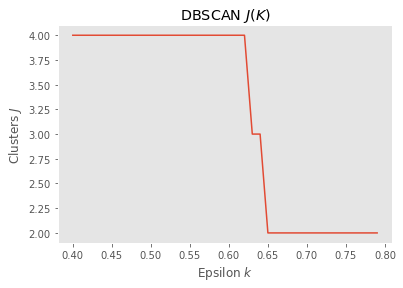

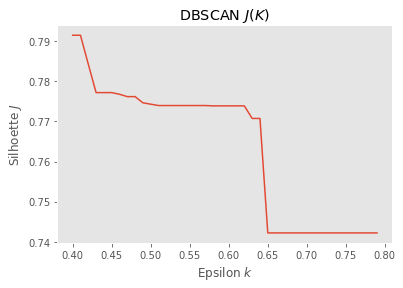

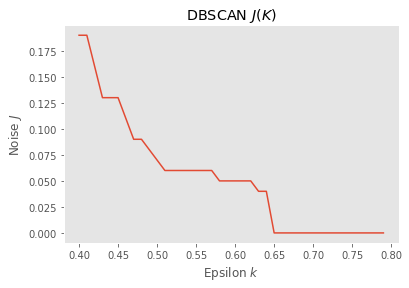

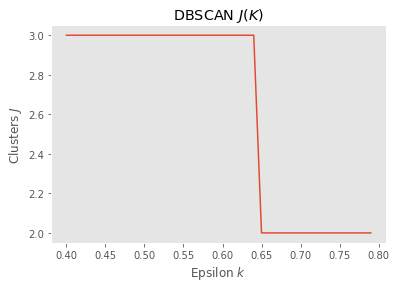

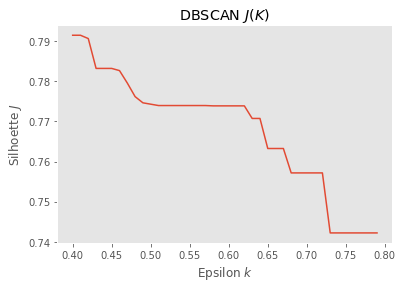

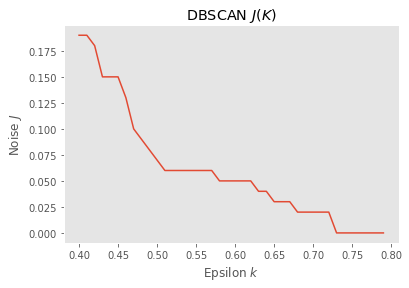

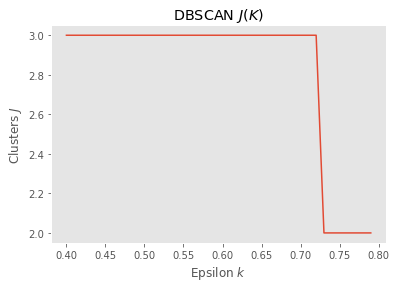

In [23]:
def analyze_eps(eps_range, spoint, mpoint, feature):
    x = feature
    criteria = np.zeros(len(eps_range))
    for j in range(spoint, mpoint):
        noise = np.zeros(len(eps_range))
        clusters = np.zeros(len(eps_range))
        for i, eps in enumerate(eps_range):
            cls = Clustering(eps, j)
            y = cls.fit_predict(x)
            noise[i] = y[y == -1].size 
            noise[i] = noise[i] / y.size
            clusters[i] = np.unique(y).size
            no_noise_x = x[y != -1]
            no_noise_y = y[y != -1]
            criteria[i] = quality(no_noise_x, no_noise_y)
        pl.plot(eps_range, criteria)
        pl.title("DBSCAN $J(K)$")
        pl.ylabel("Silhoette $J$")
        pl.xlabel("Epsilon $k$")
        pl.grid()
        pl.show()
        pl.plot(eps_range, noise)
        pl.title("DBSCAN $J(K)$")
        pl.ylabel("Noise $J$")
        pl.xlabel("Epsilon $k$")
        pl.grid()
        pl.show()
        pl.plot(eps_range, clusters)
        pl.title("DBSCAN $J(K)$")
        pl.ylabel("Clusters $J$")
        pl.xlabel("Epsilon $k$")
        pl.grid()
        pl.show()
        print np.max(criteria)
analyze_eps(np.arange(0.4, 0.8, 0.01), 3, 7, x_iris)

Как можно заметить из графиков, для данного датасета лучшее количество точек - 5, 
лучший эпсилон - 0.65. (Эпсилоны меньше не подходят из-за наличия заметного числа выбросов)

# Задание 3

In [45]:
df = pd.read_csv('WDIData.csv')


In [46]:
numofnans = dict()
for year in df.columns[4:]:
    numofnans[year] = ((np.isnan(df[year])).values.sum())

year = pd.Series(numofnans).argmin()
year

'2010'

In [105]:
dft = df[['Country Name', 'Indicator Code', '2010']]
dft = dft.set_index(['Country Name', 'Indicator Code'])
dft = dft.unstack()
dft = dft['2010']
#Just standartize
dft -= dft.mean(axis=0)
dft /= dft.std(axis=0)

In [106]:
nondelcol = 0.2
start_index = dft.columns.shape[0] * (1.0 - nondelcol)
start_index = int(start_index)
bound = np.sort((dft ** 2).sum().values)[start_index]
dft = dft[dft.columns[(dft ** 2).sum() > bound]]

In [107]:
dft = dft.fillna(0)
data = dft.iloc[:,:].values
labels = dft.index.tolist()
dft.head()

Indicator Code,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CROP.ZS,AG.LND.FRST.K2,AG.LND.FRST.ZS,AG.LND.TOTL.K2,AG.PRD.CROP.XD,AG.PRD.FOOD.XD,...,SP.RUR.TOTL.ZG,SP.RUR.TOTL.ZS,SP.URB.GROW,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,ST.INT.ARVL,ST.INT.RCPT.CD,TG.VAL.TOTL.GD.ZS,TM.VAL.MRCH.CD.WT,TX.VAL.MRCH.CD.WT
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-0.278739,0.980799,0.278222,-0.135911,-0.519698,-0.325205,-1.310099,-0.295250,0.764966,0.282835,...,1.069722,1.375439,1.118920,-0.303934,-1.375439,0.000000,-0.304503,-0.813440,-0.297642,-0.304369
Albania,-0.342451,0.289448,0.036958,0.723593,-0.193933,-0.326367,-0.144938,-0.336501,1.393545,0.377339,...,-1.931480,0.204372,-0.226954,-0.316908,-0.204372,-0.302433,-0.291649,-0.400881,-0.298072,-0.303695
Algeria,-0.272727,-0.997153,0.005807,-0.828155,-0.492128,-0.324055,-1.366109,-0.181224,0.776572,0.750772,...,-0.495570,-0.450470,0.392436,-0.263845,0.450470,-0.305652,-0.303266,-0.111358,-0.277370,-0.271344
American Samoa,-0.344528,-0.650680,-0.660767,0.105419,0.759108,-0.327904,2.526506,-0.338295,0.055609,0.157975,...,-0.441085,-1.305859,-1.593662,-0.320321,1.305859,-0.324641,0.000000,1.464240,-0.300393,-0.304409
Andorra,-0.344502,0.237097,-0.766166,-0.657250,0.000000,-0.327907,0.108394,-0.338277,0.000000,0.000000,...,2.350203,-1.315365,-1.324016,-0.320262,1.315365,-0.308082,0.000000,0.000000,0.000000,0.000000


In [108]:
q = Clustering(eps = 9, min_pts = 2)
clusters = q.fit_predict(data)
clusters

array([ 0,  0,  0, -1, -1, -1, -1,  0,  0, -1,  0,  0,  0, -1,  0,  1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
       -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,  2,  0,  0,  0,  0,  0,  0,
        0, -1,  0, -1,  0,  0,  0,  0,  0,  3,  2,  2,  2,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  4,  0, -1,  0,
        5,  6,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0, -1,  0,  0,  0, -1,  0, -1,  2,  0,  0,  0,  0,  0,  0,  0,
       -1,  0, -1,  0,  6,  0,  7, -1, -1,  0,  0,  0,  0, -1,  0, -1,  8,
       -1,  0,  0, -1,  0,  0,  0,  6, -1, -1, -1,  0,  0,  0, -1,  0, -1,
        0,  0,  0,  0,  0,  0, -1,  9,  0,  0,  0,  4, 10,  0,  0,  0, -1,
        0, -1,  0,  0,  0,  0,  0,  4,  0,  0, -1,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1, -1, -1,  7,  7, -1,  0,
        0,  0,  0,  0,  0

In [109]:
X_t = sm.TSNE(n_components=2).fit_transform(data)
X_t.dtype
X_t = X_t.astype(float64)
print data.shape

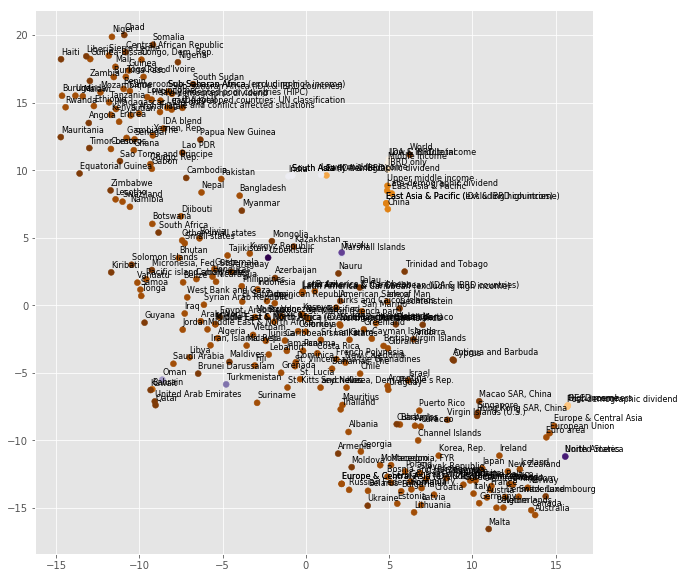

In [110]:


def plot_annotated_scatter(points, labels, clusters):
    plt.figure(figsize=(10, 10))
    plt.scatter(points[:,0], points[:,1], c=clusters, cmap=pl.cm.PuOr)
    for i, label in enumerate(labels):
        plt.annotate(str(label), xy=points[i], xytext=(0, 5), textcoords='offset points', fontsize=8)
    plt.show()

plot_annotated_scatter(X_t, labels, clusters)



# Задание 4
Вывод: DBSCAN плохо кластеризует эти данные, однако можно выделить 
несколько кластеров: азиатские страны, североамериканские страны, африканские страны

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.